In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#### Loading the pickle file

In [2]:
train_data = pd.read_pickle('train_data.pkl')
test_data = pd.read_pickle('test_data.pkl')

In [3]:
train_data.shape

(5410, 158)

In [4]:
test_data.shape

(1353, 157)

In [5]:
# Seperate out Target and providers from independent variables.Create Target column y.

X=train_data.drop(axis=1,columns=['Provider','PotentialFraud'])
y=train_data['PotentialFraud']

### Standardization

In [6]:
sc=StandardScaler()   # MinMaxScaler
sc.fit(X)
X_std=sc.transform(X)

X_teststd=sc.transform(test_data.iloc[:,1:])   #Apply Standard Scaler to unseen data as well.

In [7]:
print('X Shape:',X_std.shape)

X Shape: (5410, 156)


### Train Validation split

In [8]:
# 'stratify=y' will make sure equal distribution of yes:no in both train and validation

X_train,X_val,y_train,y_val = train_test_split(X_std,y,test_size=0.3,random_state=101,stratify=y,shuffle=True)

In [9]:
print('X_train :',X_train.shape)
print('y_train :',y_train.shape)

print('X_val :',X_val.shape)
print('y_val :',y_val.shape)

X_train : (3787, 156)
y_train : (3787,)
X_val : (1623, 156)
y_val : (1623,)


### Model Building 

#### Logistic Regression

In [10]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
lr_y_pred_train = lr.predict(X_train)
lr_y_pred_test = lr.predict(X_val)
lr_acc_train = accuracy_score(y_train, lr_y_pred_train)
lr_acc_test = accuracy_score(y_val, lr_y_pred_test)

#### Decision Tree

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred_train = dt.predict(X_train)
dt_y_pred_test = dt.predict(X_val)
dt_acc_train = accuracy_score(y_train, dt_y_pred_train)
dt_acc_test = accuracy_score(y_val, dt_y_pred_test)

#### Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred_train = rf.predict(X_train)
rf_y_pred_test = rf.predict(X_val)
rf_acc_train = accuracy_score(y_train, rf_y_pred_train)
rf_acc_test = accuracy_score(y_val, rf_y_pred_test)

#### Print Accuracy of each model

In [13]:
# Print the accuracy scores for each model
print("Random Forest Train Accuracy:", rf_acc_train)
print("Random Forest Test Accuracy:", rf_acc_test)
print("Logistic Regression Train Accuracy:", lr_acc_train)
print("Logistic Regression Test Accuracy:", lr_acc_test)
print("Decision Tree Train Accuracy:", dt_acc_train)
print("Decision Tree Test Accuracy:", dt_acc_test)

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9279112754158965
Logistic Regression Train Accuracy: 0.9408502772643254
Logistic Regression Test Accuracy: 0.9346888478126926
Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.88909426987061


#### Evaluating the performance of the Logistic Regression model

In [14]:
print('Accuracy:', accuracy_score(y_val, lr_y_pred_test))
print('Precision:', precision_score(y_val, lr_y_pred_test))
print('Recall:', recall_score(y_val, lr_y_pred_test))
print('F1-Score:', f1_score(y_val, lr_y_pred_test))
print('ROC-AUC Score:', roc_auc_score(y_val, lr_y_pred_test))
print(confusion_matrix(y_val, lr_y_pred_test))

Accuracy: 0.9346888478126926
Precision: 0.7613636363636364
Recall: 0.4407894736842105
F1-Score: 0.5583333333333333
ROC-AUC Score: 0.713256735482486
[[1450   21]
 [  85   67]]


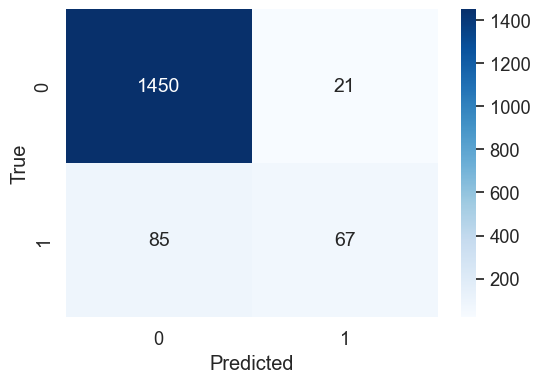

In [15]:
#1  Yes and 0  No
cm = confusion_matrix(y_val, lr_y_pred_test)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Define the hyperparameters to tune

In [16]:
hyperparameters = {'penalty': ['l1', 'l2'], 
                   'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [17]:
# Using GridSearchCV to find the best hyperparameters
lr_grid = GridSearchCV(lr, hyperparameters, cv=5, verbose=0)
lr_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [18]:
# Print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", lr_grid.best_params_)
print("Best score: ", lr_grid.best_score_)

Best hyperparameters:  {'C': 0.001, 'penalty': 'l2'}
Best score:  0.9326646985218001


In [19]:
# Train the final logistic regression classifier with best hyperparameters
lr = LogisticRegression(**lr_grid.best_params_)
lr.fit(X_train, y_train)

LogisticRegression(C=0.001)

In [20]:
# Print confusion matrix and classification report
lr_y_pred = lr.predict(X_val)
print('Accuracy:', accuracy_score(y_val, lr_y_pred))
print("\nClassification Report:")
print(classification_report(y_val, lr_y_pred))

Accuracy: 0.937769562538509

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1471
           1       0.87      0.39      0.54       152

    accuracy                           0.94      1623
   macro avg       0.91      0.69      0.75      1623
weighted avg       0.93      0.94      0.93      1623



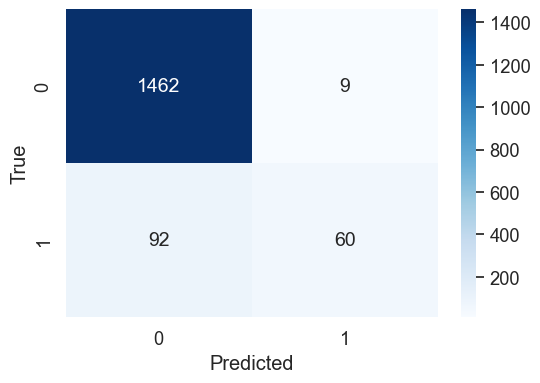

In [21]:
#1  Yes and 0  No
cm1 = confusion_matrix(y_val, lr_y_pred)

sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', annot_kws={"size": 14})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Preditcing on Test Set 

In [22]:
# Use the trained model to predict the potential fraud providers in the test set
lr_test_pred = lr.predict(X_teststd)
lr_test_pred=pd.DataFrame(lr_test_pred)

In [23]:
lr_test_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [24]:
# Lets Replace 1 with Yes and 0 With No
Replacement = {1:'Yes',0:'No'}

Labels=lr_test_pred[0].apply(lambda x : Replacement[x])
Labels.value_counts()    #Check count of Predictions

No     1305
Yes      48
Name: 0, dtype: int64

In [25]:
Labels.head()

0    No
1    No
2    No
3    No
4    No
Name: 0, dtype: object

#### Adding to test_data

In [26]:
result=pd.DataFrame({"Provider":test_data.Provider})
result['PotentialFraud']=Labels
result.shape

(1353, 2)

In [27]:
result.head()

,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No


There are potential areas for further improvement and exploration in this project. For example, we could try using other machine learning models or feature selection techniques to improve our accuracy. We could also perform more in-depth analysis on the fraudulent patterns in the dataset to gain further insights into the behavior of potential fraud providers.

Overall, this project serves as a useful example of how machine learning can be used to address important issues in the healthcare industry. By detecting and preventing fraud, we can help ensure that healthcare resources are allocated fairly and that patients receive the best possible care.